In [2]:
import sys
!{sys.executable} -m pip install nose
!{sys.executable} -m pip install otter-grader
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("04-exercise-pids2023.ipynb")

# Exercise sheet 4
**Hello everyone!**

# Points: 15

Topics of this exercise sheet are:
* Working with seaborn
* Data visualization principles

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "04-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *04-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 21.03.2023 <br>
**Submission date**: 28.03.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

## Question 1 (7 points)

We will use data from [Kaggle](https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021) about different cities around the world.

In [5]:
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")
cities

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


### 1a) (2 points)
* **Replace** the values in the columns:
       -"Cost of a bottle of water(City)"
       -"Sunshine hours(City)"
       -"Cost of a monthly gym membership(City)"
  with numerical values (float).
  
  **Hint:** Use the pandas functions .str and .as_type() and .replace()
            
  
* **Replace** the values in column "Obesity levels(Country)" to be numerical values. This means that you need to convert the percentages in decimals. For example, a value "20.40%" should be converted to "0.204".

In [6]:
# Cost of a bottle of water
cities["Cost of a bottle of water(City)"] = cities["Cost of a bottle of water(City)"].str.replace('£', '').astype(float)    # convert to to string and remove pound symbol, than convert to float
cities["Sunshine hours(City)"] = cities["Sunshine hours(City)"].str.replace('-', '0').astype(float)
cities["Cost of a monthly gym membership(City)"] = cities["Cost of a monthly gym membership(City)"].str.replace('£', '').astype(float)
cities["Obesity levels(Country)"] = cities["Obesity levels(Country)"].str.replace('%', '').astype(float).apply(lambda x: x / 100)
cities

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380,7.64,154,523,32.53
5,Helsinki,6,1662.0,1.60,0.222,80.4,13.08,1540,7.80,113,309,35.23
6,Fukuoka,7,2769.0,0.78,0.043,83.2,-,1644,5.87,35,539,55.87
7,Berlin,8,1626.0,1.55,0.223,80.6,39.41,1386,7.07,254,1729,26.11
8,Barcelona,9,2591.0,1.19,0.238,82.2,65.19,1686,6.40,585,2344,37.80
9,Vancouver,10,1938.0,1.08,0.294,81.7,24.26,1670,7.23,218,788,31.04


### 1b (1 point)
What is the mean of the column "Obesity levels(Country)"?

Assign this number to the variable *mean_obesity_level*.

In [7]:
mean_obesity_level = cities["Obesity levels(Country)"].mean()
mean_obesity_level

0.21925

### 1c (1 point)
Is the mean a good measure to summarize the values of "Obesity levels(Country)"?

* Create a histogram ( with 13 bins) for the column "Obesity levels(Country)" using the seaborn plot function.

* Which of the following distributions describes best the distribution you see on the histogramm of Obesity levels?
        - Gaussian
        - Bimodal
        - Binomial
        - Poisson
  
    * Assign the correct distribution (its name as a string) to the variable "distribution". Beware: Python is case sensitiv.
    
    
* Is the mean a good measure to summarize the values of "Obesity levels(Country)"? Yes or No?
    * Assign "yes" or "no" (as strings) to the variable called "answer".

<AxesSubplot: xlabel='Obesity levels(Country)', ylabel='Count'>

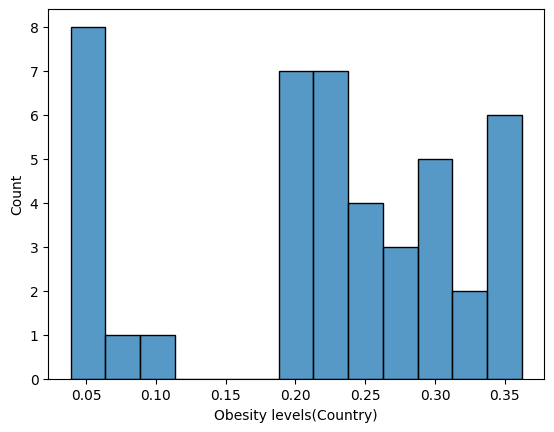

In [8]:
Obesity_levels_hist = sns.histplot(data=cities["Obesity levels(Country)"], bins=13)
distribution = "Bimodal"
answer = "no"

Obesity_levels_hist

### 1d) (2 points)
Please make a new column (for the existing data frame) called "Continent" containing the continent of each city (type: string). <br>
If a city is in multiple continents, choose one (it will make the following plots cleaner). <br>
Use this list of continent names: Africa, America, Antarctica, Australia, Asia, Europe, Oceania.

**Hint:** There is no fancy function you need, just patience.

In [9]:
# create a dictionary mapping each city to its continent
continents = {'Amsterdam': 'Europe', 'Sydney': 'Australia', 'Vienna': 'Europe', 'Stockholm': 'Europe', 
              'Copenhagen': 'Europe', 'Helsinki': 'Europe', 'Fukuoka': 'Asia', 'Berlin': 'Europe',
              'Barcelona': 'Europe', 'Vancouver': 'America', 'Melbourne': 'Australia', 
              'Beijing': 'Asia', 'Bangkok': 'Asia', 'Buenos Aires': 'America', 'Toronto': 'America',
              'Madrid': 'Europe', 'Jakarta': 'Asia', 'Seoul': 'Asia', 'Frankfurt': 'Europe', 'Geneva': 'Europe',
              'Tel Aviv': 'Asia', 'Istanbul': 'Europe', 'Cairo': 'Africa', 'Taipei': 'Asia', 
              'Los Angeles': 'America', 'Mumbai': 'Asia', 'Boston': 'America', 'Dublin': 'Europe',
              'Tokyo': 'Asia', 'Chicago': 'America', 'Hong Kong': 'Asia', 'Shanghai': 'Asia', 
              'Brussels': 'Europe', 'San Francisco': 'America', 'Paris': 'Europe', 'Sao Paulo': 'America', 
              'Zurich': 'Europe', 'London': 'Europe', 'Johannesburg': 'Africa', 'Milan': 'Europe', 
              'Washington, D.C.': 'America', 'New York': 'America', 'Moscow': 'Europe', 'Mexico City': 'America'}

# use the map() function to assign the continents to each city in the "City" column
cities["Continent"] = cities["City"].map(continents)
cities

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Continent
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434,7.44,422,1048,34.90,Europe
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712,7.22,406,1103,41.66,Australia
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501,7.29,132,1008,25.74,Europe
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452,7.35,129,598,37.31,Europe
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380,7.64,154,523,32.53,Europe
5,Helsinki,6,1662.0,1.60,0.222,80.4,13.08,1540,7.80,113,309,35.23,Europe
6,Fukuoka,7,2769.0,0.78,0.043,83.2,-,1644,5.87,35,539,55.87,Asia
7,Berlin,8,1626.0,1.55,0.223,80.6,39.41,1386,7.07,254,1729,26.11,Europe
8,Barcelona,9,2591.0,1.19,0.238,82.2,65.19,1686,6.40,585,2344,37.80,Europe
9,Vancouver,10,1938.0,1.08,0.294,81.7,24.26,1670,7.23,218,788,31.04,America


### 1e) (1 point)
What does the column "Continent" have to do with question 1c? (Hint: This is pretty similar to the penguin flipper lengths from the lecture)

* Using the seaborn histogram function (bins=10) display the column "Obesity levels(Country)" in a way such that countries on the same continent show up in the same color.
* How many bins for the continent of asia do you see?
    * Assign this number to the variable called *asia_bins*

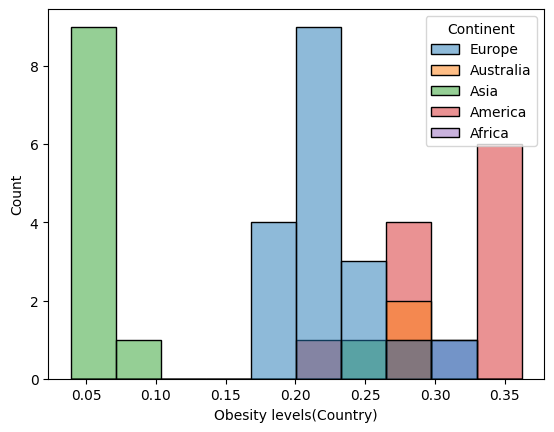

In [10]:
asia_bins = 3
color_code_plot = sns.histplot(data=cities, x="Obesity levels(Country)", hue="Continent", bins=10)
#We can now see that countries in Asia have very different obesity levels than countries in other continents.
#This means that we should take e.g. a mean per continent.

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Melbourne_skyline_from_Williamstown.png)

## Question 2 (6 points)
You have gotten the job as data visualization expert in Melbourne. 🎉 Congratulations! <br>
Your first task is to make a stunning plot to convince everyone that Melbourne is the best city in the whole wide world! We want to print it on posters! Or at least in the national tourism brochure.

* Make **one plot** using any and all (evil) principles of data visualization. If you need inspiration, look at the examples on the lecture slides or here: https://www.youtube.com/watch?v=E91bGT9BjYk or google "misleading data visualization".
* If necessary, write (max) 3 sentences to explain your plot (Comment out those sentenses with "#").

(NB: This is a manually graded Question)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 6     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

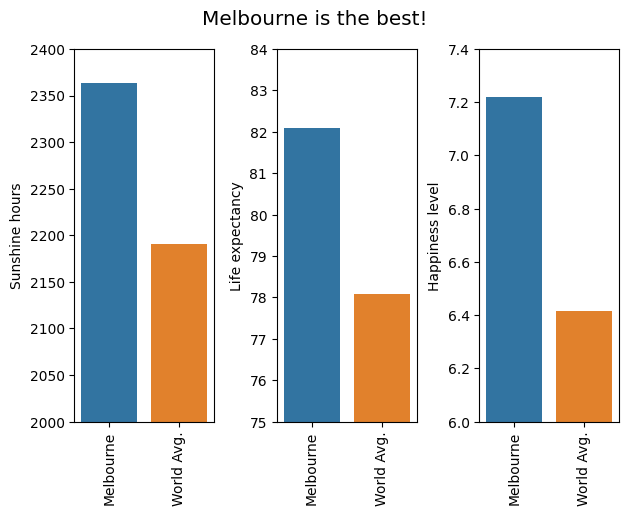

In [37]:
## solution ##
melbourne_data = cities.loc[cities["City"] == "Melbourne", ["Sunshine hours(City)",
                                                            "Life expectancy(years) (Country)",
                                                            "Happiness levels(Country)"
                                                            ]]
other_cities = cities.loc[cities["City"] != "Melbourne", ["Sunshine hours(City)",
                                                          "Life expectancy(years) (Country)",
                                                          "Happiness levels(Country)"
                                                          ]]

# calculate avg. of other_cities
other_cities_mean = other_cities.mean()

# data frame with relevant data to plot
plt_data = pd.concat([melbourne_data, other_cities_mean.to_frame().T], ignore_index=True)
plt_data['City'] = ['Melbourne', 'World Avg.']
# rename columns
plt_data.rename(columns={'Sunshine hours(City)': 'Sunshine hours',
                         'Life expectancy(years) (Country)': 'Life expectancy',
                         'Happiness levels(Country)': 'Happiness level'},
                         inplace=True)

# plot data
fig, axs = plt.subplots(nrows=1, ncols=3)

sns.barplot(data=plt_data, ax=axs[0], x='City', y='Sunshine hours')
sns.barplot(data=plt_data, ax=axs[1], x='City', y='Life expectancy')
sns.barplot(data=plt_data, ax=axs[2], x='City', y='Happiness level')

# change the graph settings to make melburne look even better
fig.suptitle('Melbourne is the best!', fontsize='x-large')
fig.tight_layout()

axs[0].set_ylim(2000, 2400)
axs[1].set_ylim(75, 84)
axs[2].set_ylim(6, 7.4)

for plot in axs:
    plot.set_xlabel('')
    plot.tick_params(axis='x', labelrotation=90)

<!-- END QUESTION -->



## Question 3 (2 points)

Where did this data even come from? Find one instance where a data point in the cities dataframe looks false. Write one sentence explaining why it is false and provide a source proving your claim.

(NB: This is a manually graded Question)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 3      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [40]:
## solution ##
cities[cities['City'] == 'Geneva']
# Geneva has 0 hours of sunshine, which is not possible.

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Continent
19,Geneva,20,0.0,2.62,0.195,82.6,27.25,1557,7.56,44,444,70.0,Europe


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [13]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 1e results: All test cases passed!